In [1]:
# based on the scikit-image.data.binary_blobs

In [2]:
import numpy as np
from skimage.filters import gaussian
from matplotlib.pyplot import figure, imshow
%matplotlib inline


def binary_blobs(shape=(5,5), sigma=1, n_dim=2,
                 volume_fraction=0.5, seed=None, points=None):
    """
    Generate synthetic binary image with several rounded blob-like objects.

    Parameters
    ----------
    length : int, optional
        Linear size of output image.
    blob_size_fraction : float, optional
        Typical linear size of blob, as a fraction of ``length``, should be
        smaller than 1.
    n_dim : int, optional
        Number of dimensions of output image.
    volume_fraction : float, default 0.5
        Fraction of image pixels covered by the blobs (where the output is 1).
        Should be in [0, 1].
    seed : int, optional
        Seed to initialize the random number generator.

    Returns
    -------
    blobs : ndarray of bools
        Output binary image

    Examples
    --------
    >>> from skimage import data
    >>> data.binary_blobs(length=5, blob_size_fraction=0.2, seed=1)
    array([[ True, False,  True,  True,  True],
           [ True,  True,  True, False,  True],
           [False,  True, False,  True,  True],
           [ True, False, False,  True,  True],
           [ True, False, False, False,  True]], dtype=bool)
    >>> blobs = data.binary_blobs(length=256, blob_size_fraction=0.1)
    >>> # Finer structures
    >>> blobs = data.binary_blobs(length=256, blob_size_fraction=0.05)
    >>> # Blobs cover a smaller volume fraction of the image
    >>> blobs = data.binary_blobs(length=256, volume_fraction=0.3)
    """
    rs = np.random.RandomState(seed)
    # shape = tuple([length] * n_dim)
    mask = np.zeros(shape)
    
    if points is None:
        # n_pts = max(int(1. / blob_size_fraction) ** n_dim, 1)
        n_pts = 10
        points = (shape[0] * rs.rand(n_dim, n_pts)).astype(np.int32)
    else:
        n_pts = len(points)
    
    mask[[indices for indices in points]] = 1
    figure(); imshow(mask)
    mask = gaussian(mask, sigma=sigma)
    figure();imshow(mask)
    threshold = np.percentile(mask, 100 * (1 - volume_fraction))
    return np.logical_not(mask < threshold)

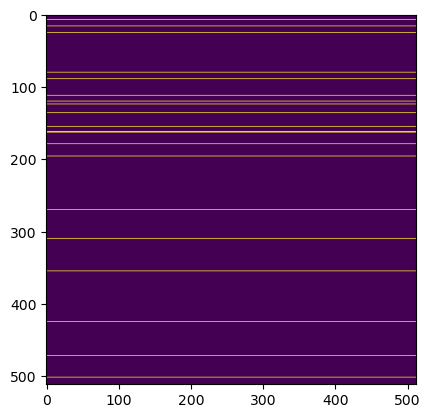

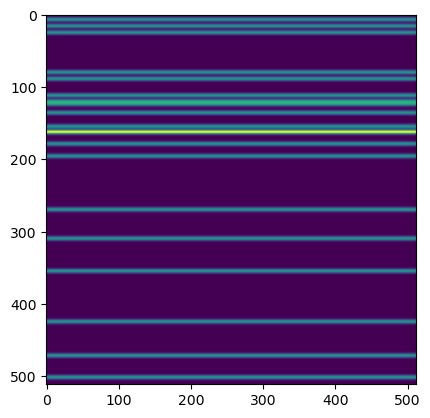

In [3]:
d = binary_blobs(shape=(512,512),sigma=2)

In [ ]:
data = np.loadtxt('.data/blob0.176047_targets',skiprows=1)

FileNotFoundError: /home/ivan/shared/IIBR_2609_cptr4_PTV/Target_Files/blob0.176047_targets not found.

In [ ]:
points = np.c_[data[:,1],data[:,2]].astype(np.int)
points.T

In [ ]:
d = binary_blobs(shape=(2304,1720),points=points,sigma=3)

In [ ]:
mask = np.zeros((1720,2304),dtype=np.uint8)

In [ ]:
for p in points:
    mask[p[1],p[0]] = 1
    
mask = img_as_uint(gaussian(mask, sigma=3))

In [ ]:
from skimage import img_as_uint

In [ ]:
imshow(img_as_uint(mask))